In [2]:
names = open('names.txt', 'r').read().splitlines()

In [33]:
names[:] = (n.lower() for n in names)
names[:5]

['michael', 'christopher', 'jessica', 'matthew', 'ashley']

In [34]:
countFreqs = {}
for n in names:
    ch = ['.'] + list(n) + ['.']
    for c1, c2 in zip(ch, ch[1:]):
        bigram = (c1, c2)
        countFreqs[bigram] = countFreqs.get(bigram, 0) + 1

In [35]:
countFreqs.items()

dict_items([(('.', 'm'), 1357), (('m', 'i'), 640), (('i', 'c'), 701), (('c', 'h'), 849), (('h', 'a'), 2153), (('a', 'e'), 236), (('e', 'l'), 1890), (('l', '.'), 1010), (('.', 'c'), 1447), (('h', 'r'), 160), (('r', 'i'), 1955), (('i', 's'), 1217), (('s', 't'), 667), (('t', 'o'), 498), (('o', 'p'), 59), (('p', 'h'), 179), (('h', 'e'), 785), (('e', 'r'), 1432), (('r', '.'), 504), (('.', 'j'), 1515), (('j', 'e'), 402), (('e', 's'), 827), (('s', 's'), 353), (('s', 'i'), 362), (('c', 'a'), 627), (('a', '.'), 5901), (('m', 'a'), 1323), (('a', 't'), 595), (('t', 't'), 415), (('t', 'h'), 471), (('e', 'w'), 47), (('w', '.'), 28), (('.', 'a'), 1532), (('a', 's'), 703), (('s', 'h'), 2052), (('h', 'l'), 65), (('l', 'e'), 1445), (('e', 'y'), 415), (('y', '.'), 1137), (('e', 'n'), 1572), (('n', 'n'), 1030), (('n', 'i'), 1106), (('i', 'f'), 91), (('f', 'e'), 100), (('j', 'o'), 385), (('o', 's'), 303), (('h', 'u'), 124), (('u', 'a'), 231), (('a', 'm'), 821), (('a', 'n'), 3195), (('n', 'd'), 925), (('d'

In [36]:
# sorting by count in descending order
sorted(countFreqs.items(), key = lambda kv: -kv[1])

[(('a', '.'), 5901),
 (('a', 'n'), 3195),
 (('e', '.'), 2897),
 (('n', '.'), 2671),
 (('a', 'r'), 2194),
 (('h', 'a'), 2153),
 (('s', 'h'), 2052),
 (('r', 'i'), 1955),
 (('e', 'l'), 1890),
 (('n', 'a'), 1797),
 (('.', 's'), 1765),
 (('e', 'n'), 1572),
 (('o', 'n'), 1563),
 (('.', 'a'), 1532),
 (('.', 'j'), 1515),
 (('r', 'a'), 1475),
 (('n', 'e'), 1468),
 (('.', 'c'), 1447),
 (('l', 'e'), 1445),
 (('l', 'a'), 1437),
 (('i', 'n'), 1436),
 (('e', 'r'), 1432),
 (('i', 'a'), 1381),
 (('.', 'k'), 1372),
 (('.', 'm'), 1357),
 (('.', 't'), 1341),
 (('m', 'a'), 1323),
 (('.', 'd'), 1289),
 (('.', 'l'), 1283),
 (('a', 'l'), 1264),
 (('t', 'a'), 1257),
 (('i', 's'), 1217),
 (('l', 'i'), 1192),
 (('r', 'e'), 1159),
 (('y', '.'), 1137),
 (('n', 'i'), 1106),
 (('n', 'n'), 1030),
 (('l', '.'), 1010),
 (('i', 'e'), 968),
 (('d', 'a'), 967),
 (('.', 'r'), 947),
 (('l', 'l'), 943),
 (('n', 'd'), 925),
 (('k', 'a'), 876),
 (('c', 'h'), 849),
 (('e', 's'), 827),
 (('a', 'm'), 821),
 (('d', 'e'), 810),
 (

In [16]:
import torch

In [61]:
# creating a 27x27 tensor to store the counts
freqs = torch.zeros((27, 27), dtype=torch.int32)

In [62]:
chars = sorted(list(set(''.join(names))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
chars[:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [74]:
for n in names:
    ch = ['.'] + list(n) + ['.']
    for c1, c2 in zip(ch, ch[1:]):
        i = stoi[c1]
        j = stoi[c2]
        freqs[i, j] += 1


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

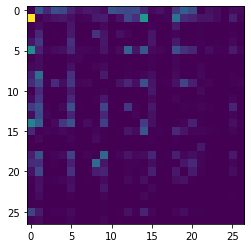

In [64]:
plt.imshow(freqs)

In [65]:
itos = {i:s for s,i in stoi.items()}

(-0.5, 26.5, 26.5, -0.5)

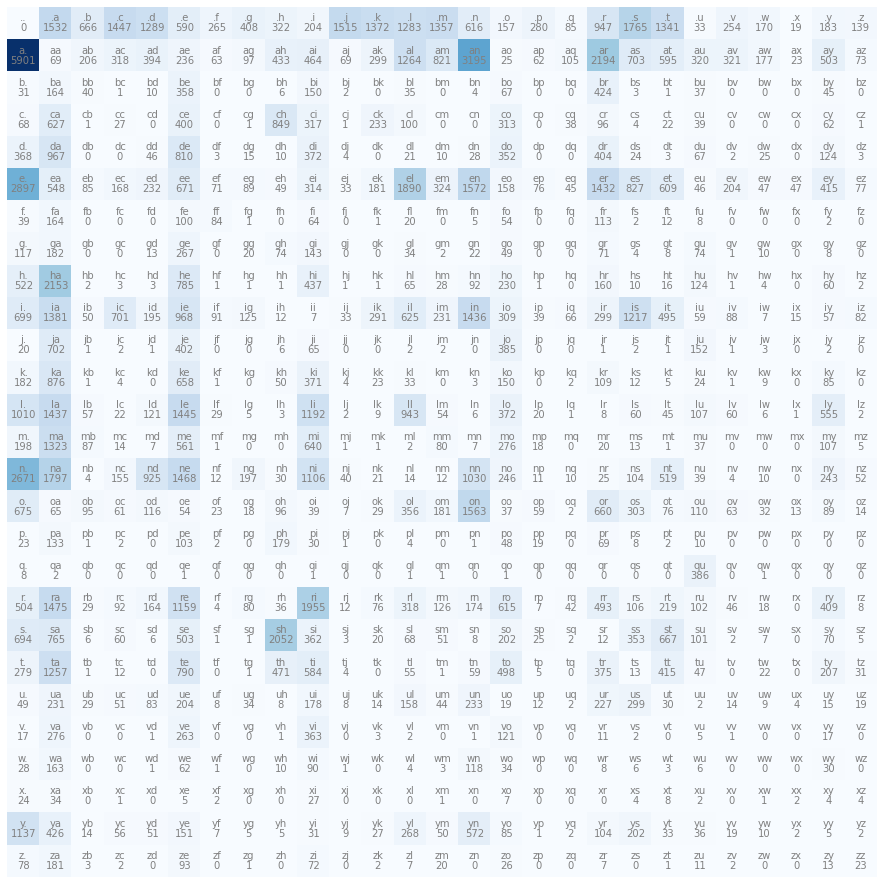

In [66]:
plt.figure(figsize=(16,16))
plt.imshow(freqs, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, freqs[i, j].item(), ha='center', va='top', color='gray')
        
plt.axis('off')

In [76]:
# converting freqs to a probability distribution
p = freqs[0].float()
p /= p.sum()
p

tensor([0.0000, 0.0840, 0.0365, 0.0793, 0.0707, 0.0323, 0.0145, 0.0224, 0.0177,
        0.0112, 0.0831, 0.0752, 0.0703, 0.0744, 0.0338, 0.0086, 0.0154, 0.0047,
        0.0519, 0.0968, 0.0735, 0.0018, 0.0139, 0.0093, 0.0010, 0.0100, 0.0076])

In [79]:
g = torch.Generator().manual_seed(2147483647)
i = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[i]

'm'

In [80]:
# model trained using bigram
for i in range(20):
    preds = []
    i = 0
    while True:
        p = freqs[i].float()
        p /= p.sum()
        i = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        preds.append(itos[i])
        if i == 0:
            break
    print(''.join(preds))

si.
aus.
mindunnnyees.
kiffoahia.
c.
memoniy.
sha.
ra.
renaha.
gariahakiondrienaactter.
ia.
t.
beleyn.
jein.
lonnicenieo.
ce.
g.
berinel.
atoss.
melfornta.


In [81]:
# untrained model. All charcters equally likely
for i in range(20):
    untrainedPreds = []
    i = 0
    while True:
        p = torch.ones(27) / 27.0
        i = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        untrainedPreds.append(itos[i])
        if i == 0:
            break
    print(''.join(untrainedPreds))

zfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.
xtyslfbmaboaanyjpojuujflcsaucqcgtjmlzqtbaisvxrtgupkppigxudejdzsroqeigovuxmvt.
jlxfolkozci.
tkhdivkdifaxcevlpktkwwvuxlymtwylgpzauwdvxfvbooflddphmjeomjgjcqeqwt.
.
wlxclcjbm.
quuyijtnzmycshclormjyrerqslomdrlbuwqnlmitbrmqhtbdwbyvlsmwnborwcdhjotezwnsxuvffvinrmedelubhdfgtavxqfgmnyqrygyevxaapbjtnwfnwewqxerdytttvfo.
iauarz.
tynoqkyp.
nzhlpnmzn.
yneemnsfksmowxjgitpdaygdpjdnzg.
mquibamvbyqqctonhkxqjdc.
uzetkngjebnkgjepglruermfkvswdogjuukk.
kgmogbltucjhexjgyqnc.
